<a href="https://colab.research.google.com/github/ridvanyigit/Tensorflow-2.0/blob/main/Tensorflow_2_0_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install tensorflow==2.18.0-rc0
!pip install mlxtend==0.17.0

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import warnings

In [31]:
warnings.filterwarnings('ignore')
tf.__version__

'2.18.0-rc0'

In [32]:
from tensorflow.keras.datasets import cifar10

In [33]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

In [34]:
classes_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [35]:
X_train.max()

255

In [36]:
X_train = X_train/255
X_test = X_test/255

In [37]:
X_train.shape

(50000, 32, 32, 3)

In [38]:
X_test.shape

(10000, 32, 32, 3)

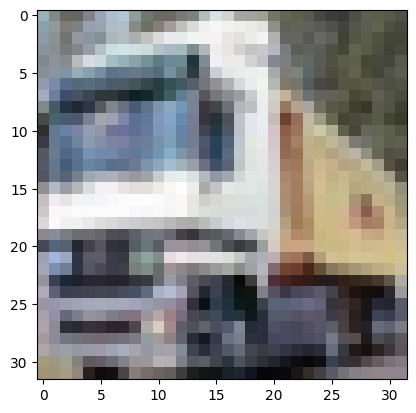

In [39]:
plt.imshow(X_train[1])

In [40]:
y_test # classes_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
                            #0          #1         #2     #3    #4    #5     #6     #7      #8      #9

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

## Building CNN Model

In [41]:
model = Sequential()

In [42]:
model.add(
    Conv2D(
        filters=32,
        kernel_size=(3,3),
        padding='same',
        activation='relu',
        input_shape=(32,32,3)
    )
)
model.add(
    Conv2D(
        filters=32,
        kernel_size=(3,3),
        padding='same',
        activation='relu'
    )
)
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_crossentropy']
    )

In [44]:
history = model.fit(X_train, y_train, batch_size=8, epochs=5, verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 296s 46ms/step - loss: 1.6212 - sparse_categorical_crossentropy: 1.6212 - val_loss: 1.1534 - val_sparse_categorical_crossentropy: 1.1534
Epoch 2/5
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 306s 43ms/step - loss: 1.1199 - sparse_categorical_crossentropy: 1.1199 - val_loss: 1.0245 - val_sparse_categorical_crossentropy: 1.0245
Epoch 3/5
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 322s 43ms/step - loss: 0.9776 - sparse_categorical_crossentropy: 0.9776 - val_loss: 0.9444 - val_sparse_categorical_crossentropy: 0.9444
Epoch 4/5
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 273s 44ms/step - loss: 0.8837 - sparse_categorical_crossentropy: 0.8837 - val_loss: 0.9562 - val_sparse_categorical_crossentropy: 0.9562
Epoch 5/5
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 289s 46ms/step - loss: 0.8185 - sparse_categorical_crossentropy: 0.8185 - val_loss: 0.9194 - val_sparse_categorical_crossentropy: 0.9194


**OVERFITTING**

In [45]:
"""
Overfitting starts around epoch 4.
This is indicated by the validation loss starting to increase
while the training loss continues to decrease.
It suggests the model is memorizing the training data rather
than generalizing well to unseen data.
"""

'\nOverfitting starts around epoch 4. \nThis is indicated by the validation loss starting to increase \nwhile the training loss continues to decrease. \nIt suggests the model is memorizing the training data rather \nthan generalizing well to unseen data.\n'

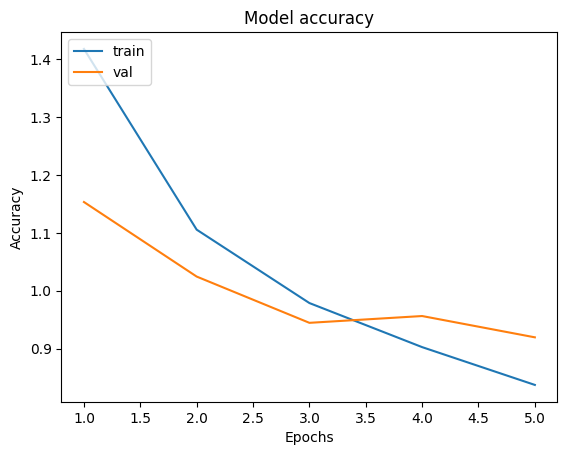

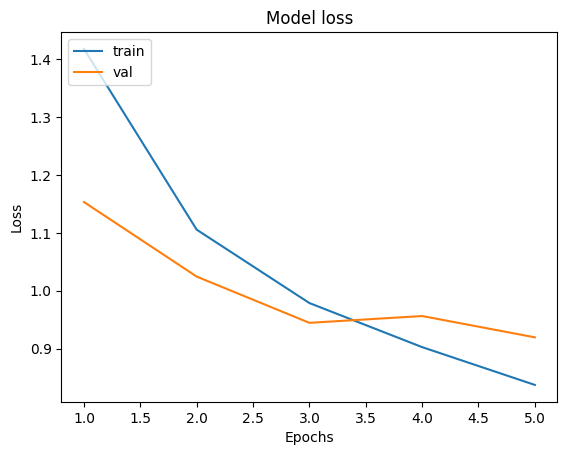

In [47]:
# plot training & validation accuracy values
epoch_range = range(1, 6)
plt.plot(epoch_range, history.history['sparse_categorical_crossentropy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_crossentropy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot training & validation loss values
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [52]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score

In [56]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
np.set_printoptions(precision=2, threshold=np.inf)
concatenated_array = np.concatenate((y_pred_classes.reshape(len(y_pred_classes),1), y_test.reshape(len(y_test),1)),1)
print(concatenated_array[:50])

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
[[3 3]
 [8 8]
 [8 8]
 [0 0]
 [6 6]
 [6 6]
 [1 1]
 [4 6]
 [3 3]
 [1 1]
 [0 0]
 [9 9]
 [5 5]
 [7 7]
 [9 9]
 [3 8]
 [5 5]
 [3 7]
 [8 8]
 [6 6]
 [1 7]
 [0 0]
 [0 4]
 [9 9]
 [4 5]
 [4 2]
 [4 4]
 [0 0]
 [9 9]
 [6 6]
 [6 6]
 [2 5]
 [4 4]
 [3 5]
 [9 9]
 [9 2]
 [4 4]
 [9 1]
 [9 9]
 [5 5]
 [0 4]
 [6 6]
 [3 5]
 [6 6]
 [0 0]
 [9 9]
 [3 3]
 [9 9]
 [7 7]
 [6 6]]


In [53]:
accuracy_score(y_test, y_pred_classes)

0.68

In [50]:
cm = confusion_matrix(y_test, y_pred_classes)
cm

array([[742,  27,  41,  24,  23,   6,   9,   6,  68,  54],
       [ 16, 854,   5,  13,   1,   5,   4,   2,  27,  73],
       [ 85,  10, 447,  84, 185,  73,  61,  24,  17,  14],
       [ 31,  18,  46, 571,  84, 141,  65,  12,  20,  12],
       [ 28,  11,  41,  80, 720,  35,  43,  33,   9,   0],
       [ 14,   7,  42, 256,  74, 549,  15,  24,  12,   7],
       [  7,  14,  33, 102,  80,  32, 718,   3,   9,   2],
       [ 19,   9,  30,  80,  99,  73,   3, 657,   7,  23],
       [ 66,  49,  11,  17,   7,   3,   2,   3, 816,  26],
       [ 25, 162,   6,  20,   7,   8,   6,   7,  33, 726]])

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

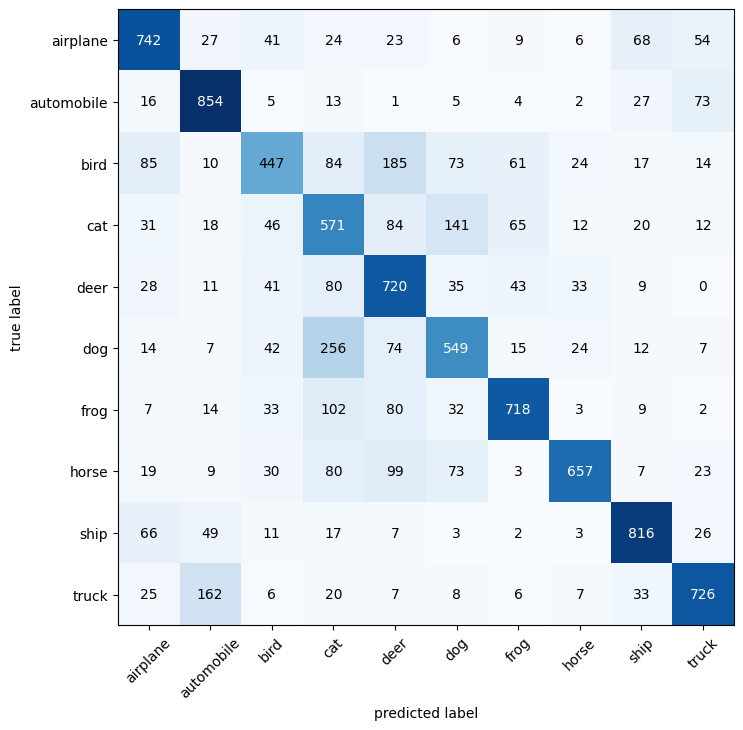

In [51]:
plot_confusion_matrix(conf_mat=cm, figsize=(12,8), class_names=classes_name)